In [10]:
#task 1
import numpy as np

# Initialize inputs and weights
X = np.array([5, 10, 30, 1])  # Input features: [height, weight, age, smoking]
y = 20  # Target output

# Weights
W1, W2, W3, W4, W5, W6 = 1, 0, -1, 0.5, 1, -1
learning_rate = 0.01

# Forward pass
H1 = W1 * X[0] + W2 * X[1]  # H1 = 1*5 + 0*10 = 5
H2 = W3 * X[0] + W4 * X[3]  # H2 = -1*5 + 0.5*1 = -5 + 0.5 = -4.5
y_hat = W5 * H1 + W6 * H2  # y_hat = 1*5 + (-1*-4.5) = 5 + 4.5 = 9.5

# Compute error
error = (y_hat - y) ** 2  # (9.5 - 20)^2 = 110.25

# Backpropagation (Gradient Calculation)
dJ_dy_hat = 2 * (y_hat - y)  # Derivative of loss w.r.t y_hat
dy_hat_dW5 = H1  # Derivative of y_hat w.r.t W5
dJ_dW5 = dJ_dy_hat * dy_hat_dW5  # Chain rule for W5

# Update W5 manually
W5 = W5 - learning_rate * dJ_dW5

# Update W1 manually
dy_hat_dH1 = W5
dH1_dW1 = X[0]
dJ_dH1 = dJ_dy_hat * dy_hat_dH1
dJ_dW1 = dJ_dH1 * dH1_dW1
W1 = W1 - learning_rate * dJ_dW1

# Print results
print(f"Updated W5: {W5:.4f}")
print(f"Updated W1: {W1:.4f}")


Updated W5: 2.0500
Updated W1: 3.1525


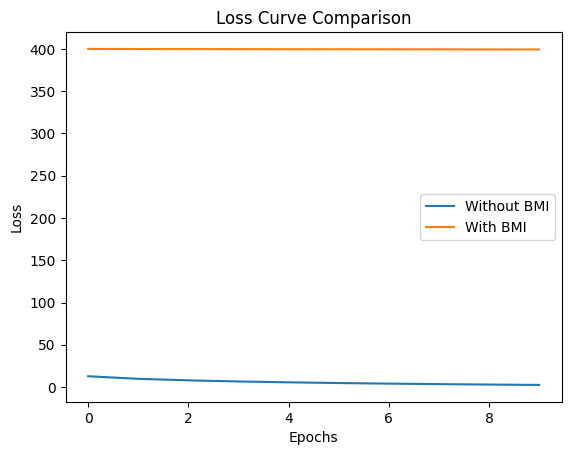

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Dataset with nonlinear feature (BMI)
X = np.array([[5, 10, 30, 1]])  # [height, weight, age, smoking]
y = np.array([20])  # Target output
BMI = X[:, 1] / (X[:, 0] ** 2)  # BMI calculation

# Define feedforward network without BMI
model1 = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=(4,)),
    layers.Dense(1)
])
model1.compile(optimizer=keras.optimizers.RMSprop(), loss='mse')

# Train without BMI
history1 = model1.fit(X, y, epochs=10, verbose=0)

# Define feedforward network with BMI
X_with_BMI = np.hstack((X, BMI.reshape(-1, 1)))
model2 = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=(5,)),
    layers.Dense(1)
])
model2.compile(optimizer=keras.optimizers.RMSprop(), loss='mse')

# Train with BMI
history2 = model2.fit(X_with_BMI, y, epochs=10, verbose=0)

# Plot loss curves
plt.plot(history1.history['loss'], label='Without BMI')
plt.plot(history2.history['loss'], label='With BMI')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve Comparison')
plt.show()


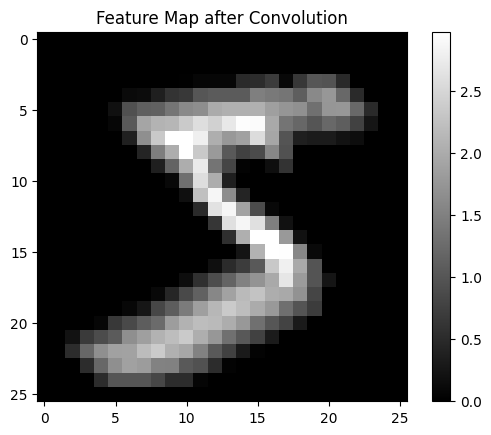

In [18]:
#task 3

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load dataset (e.g., MNIST 28x28 grayscale images)
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0  # Normalize images
X_train = X_train[..., np.newaxis]  # Add channel dimension -> (60000, 28, 28, 1)

# Define a single 3x3 filter manually with correct shape (height, width, in_channels, out_channels)
filter_weights = np.array([
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
], dtype='float32')

# Reshape to (3,3,1,1) for TensorFlow Conv2D
filter_weights = np.reshape(filter_weights, (3, 3, 1, 1))

# Select one image
image = X_train[0:1]  # Shape (1, 28, 28, 1)

# Apply convolution with correct strides and padding
conv_output = tf.nn.conv2d(image, filter_weights, strides=[1, 1, 1, 1], padding='VALID')

# Visualize the resulting feature map
plt.imshow(conv_output[0, :, :, 0], cmap='gray')
plt.title("Feature Map after Convolution")
plt.colorbar()
plt.show()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 507)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,110 (19.96 KB)

 Trainable params: 5,110 (19.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9115 - loss: 0.2926 - val_accuracy: 0.9556 - val_loss: 0.1723
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9505 - loss: 0.1750 - val_accuracy: 0.9538 - val_loss: 0.1896
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9479 - loss: 0.1931 - val_accuracy: 0.9439 - val_loss: 0.2658
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9518 - loss: 0.1808 - val_accuracy: 0.9559 - val_loss: 0.2033
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9502 - loss: 0.1892 - val_accuracy: 0.9519 - val_loss: 0.1709
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9524 - loss: 0.1809 - val_accuracy: 0.9438 - val_loss: 0.2283
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.9540 - loss: 0.1759 - val_accuracy: 0.9401 - val_loss: 0.2838
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9509 -

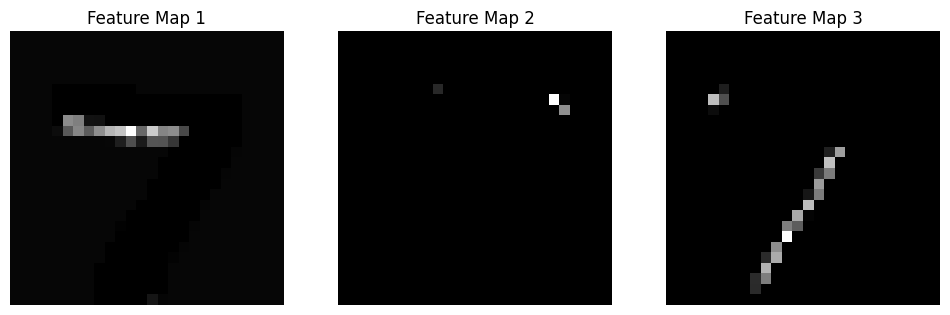

Initial training accuracy: 0.9347


In [22]:
#task 4

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset (MNIST: 28x28 grayscale images)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images to [0, 1] and expand dimensions for CNN (batch, height, width, channels)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode labels for softmax output
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# ✅ Define CNN model with explicit input shape
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=3, kernel_size=(3, 3), activation="relu", name="conv1")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# ✅ Ensure model is built before extracting feature maps
model.summary()

# Train model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# ✅ Extract feature maps from the first convolutional layer
conv_layer = model.get_layer("conv1")
feature_extractor = keras.Model(inputs=model.input, outputs=conv_layer.output)

# Get feature maps for a single test image
sample_image = np.expand_dims(X_test[0], axis=0)
feature_maps = feature_extractor.predict(sample_image)

# Visualize 3 feature maps
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(feature_maps[0, :, :, i], cmap="gray")
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis("off")

plt.show()

# Report initial accuracy
initial_accuracy = history.history["accuracy"][0]
print(f"Initial training accuracy: {initial_accuracy:.4f}")


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.9033 - loss: 0.3230 - val_accuracy: 0.9250 - val_loss: 0.2287
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9397 - loss: 0.2317 - val_accuracy: 0.9418 - val_loss: 0.2044
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9424 - loss: 0.2143 - val_accuracy: 0.9468 - val_loss: 0.1807
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - accuracy: 0.9462 - loss: 0.2109 - val_accuracy: 0.9172 - val_loss: 0.2797
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9433 - loss: 0.2220 - val_accuracy: 0.9330 - val_loss: 0.2380
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9459 - loss: 0.2111 - val_accuracy: 0.9444 - val_loss: 0.1895
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9482 - loss: 0.1926 - val_accuracy: 0.9371 - val_loss: 0.2199
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9414 -

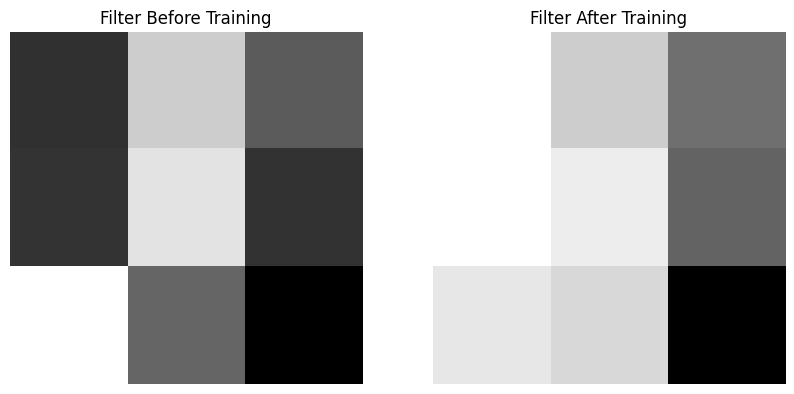

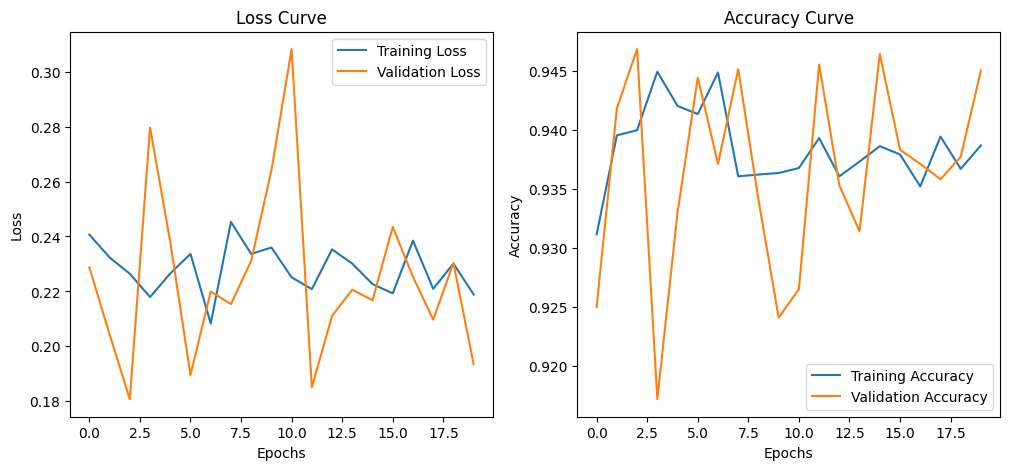

In [24]:
#task 5

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset (MNIST: 28x28 grayscale images)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images to [0, 1] and expand dimensions for CNN (batch, height, width, channels)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode labels for softmax output
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# ✅ Define CNN model
inputs = keras.Input(shape=(28, 28, 1))
conv_layer = layers.Conv2D(filters=3, kernel_size=(3, 3), activation="relu", name="conv1")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(conv_layer)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

# Create model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# ✅ Extract initial filter weights BEFORE training
initial_weights = model.layers[1].get_weights()[0]  # Shape: (3,3,1,3)

# ✅ Train model for 20 epochs and monitor loss/accuracy
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# ✅ Extract filter weights AFTER training
final_weights = model.layers[1].get_weights()[0]

# ✅ Visualize filter changes for one filter (first channel)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(initial_weights[:, :, 0, 0], cmap="gray")
axes[0].set_title("Filter Before Training")
axes[0].axis("off")

axes[1].imshow(final_weights[:, :, 0, 0], cmap="gray")
axes[1].set_title("Filter After Training")
axes[1].axis("off")

plt.show()

# ✅ Plot loss and accuracy curves
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Loss curve
ax[0].plot(history.history["loss"], label="Training Loss")
ax[0].plot(history.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Curve")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Accuracy curve
ax[1].plot(history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Curve")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0038 - mae: 0.0415 - val_loss: 0.0019 - val_mae: 0.0345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0019 - val_mae: 0.0345
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0019 - val_mae: 0.0345
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0019 - val_mae: 0.0346
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0019 - val_mae: 0.0345
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0019 - val_mae: 0.0344
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0020 - val_mae: 0.0345
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0019 - val_mae: 0.0346
Epoch 9/10
1875/1875 ━━━━━━━━━━━

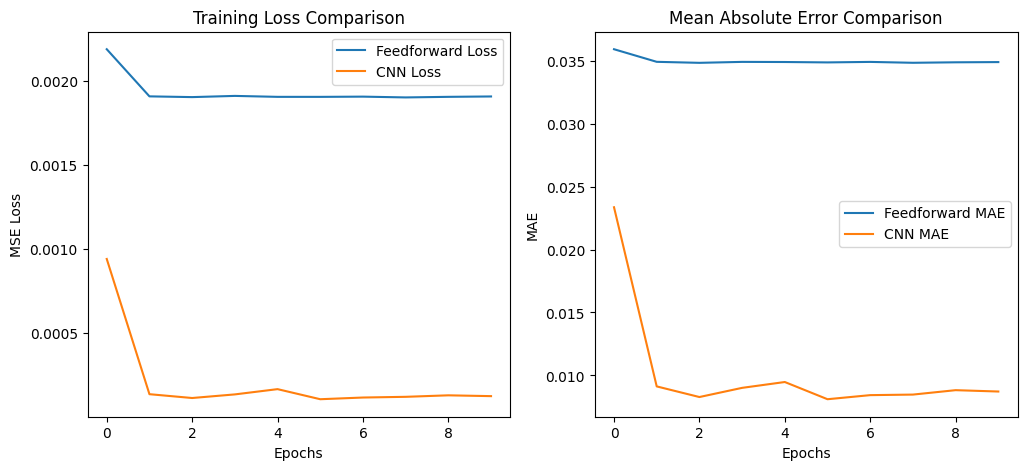

In [26]:
#bonus task

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# ✅ Step 1: Load or Generate Dataset (Grayscale Images + Brightness Label)
# Using MNIST as an example, where target is average pixel brightness.
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

# Normalize images to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Compute brightness label (mean pixel intensity)
y_train = np.mean(X_train, axis=(1, 2))  # Shape: (60000,)
y_test = np.mean(X_test, axis=(1, 2))  # Shape: (10000,)

# Reshape images for CNN input
X_train_CNN = np.expand_dims(X_train, axis=-1)  # Shape: (60000, 28, 28, 1)
X_test_CNN = np.expand_dims(X_test, axis=-1)

# Flatten images for Feedforward Network
X_train_FF = X_train.reshape((X_train.shape[0], -1))  # Shape: (60000, 784)
X_test_FF = X_test.reshape((X_test.shape[0], -1))

# ✅ Step 2: Define Feedforward Network
ff_model = keras.Sequential([
    keras.Input(shape=(784,)),  # 28x28 flattened
    layers.Dense(2, activation="relu"),  # 2 hidden units
    layers.Dense(1)  # Regression output (no activation)
])
ff_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                 loss="mean_squared_error",
                 metrics=["mae"])

# ✅ Step 3: Define CNN Model
cnn_inputs = keras.Input(shape=(28, 28, 1))
conv_layer = layers.Conv2D(filters=1, kernel_size=(3, 3), activation="relu")(cnn_inputs)
flatten_layer = layers.Flatten()(conv_layer)
cnn_outputs = layers.Dense(1)(flatten_layer)  # Regression output
cnn_model = keras.Model(inputs=cnn_inputs, outputs=cnn_outputs)

cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss="mean_squared_error",
                  metrics=["mae"])

# ✅ Step 4: Train Both Models for 10 Epochs
ff_history = ff_model.fit(X_train_FF, y_train, epochs=10, validation_data=(X_test_FF, y_test))
cnn_history = cnn_model.fit(X_train_CNN, y_train, epochs=10, validation_data=(X_test_CNN, y_test))

# ✅ Compare Loss Curves
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Loss comparison
ax[0].plot(ff_history.history["loss"], label="Feedforward Loss")
ax[0].plot(cnn_history.history["loss"], label="CNN Loss")
ax[0].set_title("Training Loss Comparison")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE Loss")
ax[0].legend()

# MAE comparison
ax[1].plot(ff_history.history["mae"], label="Feedforward MAE")
ax[1].plot(cnn_history.history["mae"], label="CNN MAE")
ax[1].set_title("Mean Absolute Error Comparison")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("MAE")
ax[1].legend()

plt.show()
